In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

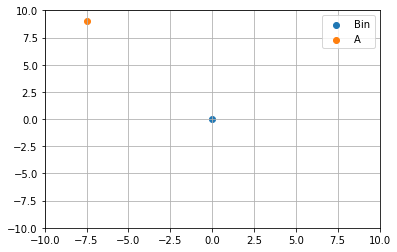

In [52]:
bin_x = 0
bin_y = 0

starting_position_x = -7.5
starting_position_y = 9

plt.scatter(bin_x, bin_y, label = "Bin")
plt.scatter(starting_position_x, starting_position_y, label = "A")
plt.ylim([-10,10])
plt.xlim([-10,10])
plt.grid()
plt.legend()
plt.show()

In [11]:
import pandas as pd
import numpy as np

In [12]:
def probability(bin_x, bin_y, state_x, state_y, throw_deg):


    #First throw exception rule if person is directly on top of bin:
    if((state_x==bin_x) & (state_y==bin_y)):
        probability = 1
    else:
        
        
        # To accomodate for going over the 0 degree line
        if((throw_deg>270) & (state_x<=bin_x) & (state_y<=bin_y)):
            throw_deg = throw_deg - 360
        elif((throw_deg<90) & (state_x>bin_x) & (state_y<bin_y)):
            throw_deg = 360 + throw_deg
        else:
            throw_deg = throw_deg
            
        # Calculate Euclidean distance
        distance = ((bin_x - state_x)**2 + (bin_y - state_y)**2)**0.5

        # max distance for bin will always be on of the 4 corner points:
        corner_x = [-10,-10,10,10]
        corner_y = [-10,10,-10,10]
        dist_table = pd.DataFrame()
        for corner in range(0,4):
            dist = pd.DataFrame({'distance':((bin_x - corner_x[corner])**2 + (bin_y - corner_y[corner])**2)**0.5}, index = [corner])
            dist_table = dist_table.append(dist)
        dist_table = dist_table.reset_index()
        dist_table = dist_table.sort_values('distance', ascending = False)
        max_dist = dist_table['distance'][0]
        
        distance_score = 1 - (distance/max_dist)


        # First if person is directly horizontal or vertical of bin:
        if((state_x==bin_x) & (state_y>bin_y)):
            direction = 180
        elif((state_x==bin_x) & (state_y<bin_y)):
             direction = 0
        
        elif((state_x>bin_x) & (state_y==bin_y)):
             direction = 270
        elif((state_x<bin_x) & (state_y==bin_y)):
             direction = 90
        
        # If person is north-east of bin:
        elif((state_x>bin_x) & (state_y>bin_y)):
            opp = abs(bin_x - state_x)
            adj = abs(bin_y - state_y)
            direction = 180 +  np.degrees(np.arctan(opp/adj))

        # If person is south-east of bin:
        elif((state_x>bin_x) & (state_y<bin_y)):
            opp = abs(bin_y - state_y)
            adj = abs(bin_x - state_x)
            direction = 270 +  np.degrees(np.arctan(opp/adj))

        # If person is south-west of bin:
        elif((state_x<bin_x) & (state_y<bin_y)):
            opp = abs(bin_x - state_x)
            adj = abs(bin_y - state_y)
            direction =  np.degrees(np.arctan(opp/adj))

        # If person is north-west of bin:
        elif((state_x<bin_x) & (state_y>bin_y)):
            opp = abs(bin_y - state_y)
            adj = abs(bin_x - state_x)
            direction = 90 +  np.degrees(np.arctan(opp/adj))
            
        direction_score = (45-abs(direction - throw_deg))/45
      
        probability = distance_score*direction_score
        if(probability>0):
            probability = probability
        else:
            probability = 0
        
    return(probability)
  

In [13]:
bin_x = 0
bin_y = 0

starting_position_x = -7.5
starting_position_y = 9

test_1 = probability(bin_x, bin_y, starting_position_x, starting_position_y, 50)
test_2 = probability(bin_x, bin_y, starting_position_x, starting_position_y, 60)


In [14]:
print("Probability of first throw at 50 degrees = ", np.round(test_1,4))
print("Probability of second throw at 60 degress = ", np.round(test_2,4))

Probability of first throw at 50 degrees =  0.4444
Probability of second throw at 60 degress =  0.3333


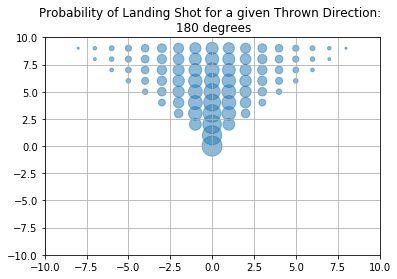

In [15]:
bin_x = 0
bin_y = 0
throw_direction = 180

prob_table = pd.DataFrame()
for i in range(0,20):
    state_x = -10 + i
    for j in range(0,20):
        state_y = -10 + j
        prob = pd.DataFrame({'x':state_x,'y':state_y,'prob':probability(bin_x, bin_y, state_x, state_y, throw_direction)}, index = [0])
        prob_table = prob_table.append(prob)
prob_table = prob_table.reset_index()

plt.scatter(prob_table['x'], prob_table['y'], s=prob_table['prob']*400, alpha=0.5)
plt.ylim([-10,10])
plt.xlim([-10,10])
plt.grid()
plt.title("Probability of Landing Shot for a given Thrown Direction: \n " + str(throw_direction)+" degrees")
plt.show()


In [ ]:
conda install -c plotly plotly chart-studio

In [19]:
bin_x = 0
bin_y = 0

prob_table = pd.DataFrame()
for z in range(0,37):
    throw_direction = z*10
    for i in range(0,20):
        state_x = -10 + i
        for j in range(0,20):
            state_y = -10 + j
            prob = pd.DataFrame({'throw_dir':throw_direction,'x':state_x,'y':state_y,'prob':probability(bin_x, bin_y, state_x, state_y, throw_direction)}, index = [0])
            prob_table = prob_table.append(prob)
prob_table = prob_table.reset_index(drop=True)

In [20]:
prob_table.head()

,throw_dir,x,y,prob
0,0,-10,-10,0.0
1,0,-10,-9,0.0
2,0,-10,-8,0.0
3,0,-10,-7,0.0
4,0,-10,-6,0.0


In [ ]:
#Define Q(s,a) table by all possible states and THROW actions initialised to 0
Q_table = pd.DataFrame()
for z in range(0,360):
    throw_direction = int(z)
    for i in range(0,21):
        state_x = int(-10 + i)
        for j in range(0,21):
            state_y = int(-10 + j)
            reward = 0
            Q = pd.DataFrame({'throw_dir':throw_direction,'move_dir':"none",'state_x':state_x,'state_y':state_y,'Q':0, 'reward': reward}, index = [0])
            Q_table = Q_table.append(Q)
Q_table = Q_table.reset_index(drop=True)
print("Q table 1 initialised")
#Q_table.head()

In [24]:
#Define Q(s,a) table by all possible states and MOVE actions initialised to 0

for x in range(0,21):
    state_x = int(-10 + x)
    for y in range(0,21):
        state_y = int(-10 + y)
        for m in range(0,8):
            move_dir = int(m)
            
            # skip impossible moves starting with 4 corners then edges
            if((state_x==10)&(state_y==10)&(move_dir==0)):
                continue
            elif((state_x==10)&(state_y==10)&(move_dir==2)):
                continue
                
            elif((state_x==10)&(state_y==-10)&(move_dir==2)):
                continue
            elif((state_x==10)&(state_y==-10)&(move_dir==4)):
                continue
                
            elif((state_x==-10)&(state_y==-10)&(move_dir==4)):
                continue
            elif((state_x==-10)&(state_y==-10)&(move_dir==6)):
                continue
                
            elif((state_x==-10)&(state_y==10)&(move_dir==6)):
                continue
            elif((state_x==-10)&(state_y==10)&(move_dir==0)):
                continue
                
            elif((state_x==10) & (move_dir == 1)):
                continue
            elif((state_x==10) & (move_dir == 2)):
                continue
            elif((state_x==10) & (move_dir == 3)):
                continue
                 
            elif((state_x==-10) & (move_dir == 5)):
                continue
            elif((state_x==-10) & (move_dir == 6)):
                continue
            elif((state_x==-10) & (move_dir == 7)):
                continue
                 
            elif((state_y==10) & (move_dir == 1)):
                continue
            elif((state_y==10) & (move_dir == 0)):
                continue
            elif((state_y==10) & (move_dir == 7)):
                continue
                 
            elif((state_y==-10) & (move_dir == 3)):
                continue
            elif((state_y==-10) & (move_dir == 4)):
                continue
            elif((state_y==-10) & (move_dir == 5)):
                continue
                 
            else:
                reward = 0
                Q = pd.DataFrame({'throw_dir':"none",'move_dir':move_dir,'state_x':state_x,'state_y':state_y,'Q':0, 'reward': reward}, index = [0])
                Q_table = Q_table.append(Q)
Q_table = Q_table.reset_index(drop=True)
print("Q table 2 initialised")
Q_table.tail()

Q table 2 initialised


,throw_dir,move_dir,state_x,state_y,Q,reward
162035,none,6,10,9,0,0
162036,none,7,10,9,0,0
162037,none,4,10,10,0,0
162038,none,5,10,10,0,0
162039,none,6,10,10,0,0


In [25]:
Q_table[(Q_table['state_x']==-10) &(Q_table['throw_dir']=="none")].head(5)

,throw_dir,move_dir,state_x,state_y,Q,reward
158760,none,0,-10,-10,0,0
158761,none,1,-10,-10,0,0
158762,none,2,-10,-10,0,0
158763,none,0,-10,-9,0,0
158764,none,1,-10,-9,0,0


In [26]:
Q_table_VI = Q_table.copy()
Q_table_VI['V'] = 0

In [27]:
bin_x = 0
bin_y = 0

prob_list = pd.DataFrame()
for n,action in enumerate(Q_table_VI['throw_dir']):
    # Guarantee 100% probability if movement
    if(action == "none"):
        prob = 1
    # Calculate if thrown
    else:
        prob = probability(bin_x, bin_y, Q_table_VI['state_x'][n], Q_table_VI['state_y'][n], action)
    prob_list = prob_list.append(pd.DataFrame({'prob':prob}, index = [n] ))
prob_list = prob_list.reset_index(drop=True)
Q_table_VI['prob'] = prob_list['prob']

In [29]:
Q_table_VI.head(5)
Q_table_VI[ (Q_table_VI['state_x']==-1) & (Q_table_VI['state_y']==-1) & (Q_table_VI['throw_dir']==45)]

,throw_dir,move_dir,state_x,state_y,Q,reward,V,prob
20043,45,none,-1,-1,0,0,0,0.9


In [30]:
import time
from IPython.display import clear_output

In [31]:
input_table = Q_table_VI.copy()
gamma = 0.8
num_repeats = 5

start_time = time.time()

output_metric_table = pd.DataFrame()
# Repeat until converges
for repeats in range(0,num_repeats):
    clear_output(wait=True)
    state_sub_full = pd.DataFrame()
    
    
    output_metric_table = output_metric_table.append(pd.DataFrame({'mean_Q':input_table['Q'].mean(), 
                                                                   'sum_Q': input_table['Q'].sum(),
                                                                   'mean_V':input_table[['state_x', 'state_y','V']].drop_duplicates(['state_x', 'state_y', 'V'])['V'].mean(),
                                                                   'sum_V': input_table[['state_x', 'state_y','V']].drop_duplicates(['state_x', 'state_y', 'V'])['V'].sum()}, index = [repeats]))
    
    
    # Iterate over all states defined by max - min of x times by max - min of y
    for x in range(0,21):
        state_x = -10 + x
        for y in range(0,21):
            state_y = -10 + y

            state_sub = input_table[ (input_table['state_x']==state_x) & (input_table['state_y']==state_y)]
            Q_sub_list = pd.DataFrame()
            for n, action in state_sub.iterrows():
                # Move action update Q
                if(action['throw_dir'] == "none"):
                    move_direction = action['move_dir']
                    #Map this to actual direction and find V(s) for next state
                    if(move_direction == 0):
                        move_x = 0
                        move_y = 1
                    elif(move_direction == 1):
                        move_x = 1
                        move_y = 1
                    elif(move_direction == 2):
                        move_x = 1
                        move_y = 0
                    elif(move_direction == 3):
                        move_x = 1
                        move_y = -1
                    elif(move_direction == 4):
                        move_x = 0
                        move_y = -1
                    elif(move_direction == 5):
                        move_x = -1
                        move_y = -1
                    elif(move_direction == 6):
                        move_x = -1
                        move_y = 0
                    elif(move_direction == 7):
                        move_x = -1
                        move_y = 1
                    Q = 1*(action['reward'] + gamma*max(input_table[ (input_table['state_x']==int(state_x+move_x)) & (input_table['state_y']==int(state_y+move_y))]['V']) )
                # Throw update Q +1 if sucessful throw or -1 if failed
                else:
                    Q = (action['prob']*(action['reward'] + gamma*1)) +  ((1-action['prob'])*(action['reward'] + gamma*-1))
                Q_sub_list = Q_sub_list.append(pd.DataFrame({'Q':Q}, index = [n]))
            state_sub['Q'] = Q_sub_list['Q']
            state_sub['V'] = max(state_sub['Q'])
            state_sub_full = state_sub_full.append(state_sub)
            
            

    
            
    input_table = state_sub_full.copy()
    print("Repeats completed: ", np.round((repeats+1)/num_repeats,2)*100, "%")
    
end_time = time.time()

print("total time taken this loop: ", np.round((end_time - start_time)/60,2), " minutes")

Repeats completed:  100.0 %
total time taken this loop:  13.73  minutes


In [32]:
state_sub_full.head(3)

,throw_dir,move_dir,state_x,state_y,Q,reward,V,prob
0,0,none,-10,-10,-0.8,0,0.0,0.0
441,1,none,-10,-10,-0.8,0,0.0,0.0
882,2,none,-10,-10,-0.8,0,0.0,0.0


In [33]:
state_sub_full[ (state_sub_full['state_x']==-4) & (state_sub_full['state_y']==-4) & (state_sub_full['Q']== max(state_sub_full[ (state_sub_full['state_x']==-4) & (state_sub_full['state_y']==-4)]['Q']))]

,throw_dir,move_dir,state_x,state_y,Q,reward,V,prob
159717,none,1,-4,-4,0.32768,0,0.32768,1.0


In [34]:
output_metric_table

,mean_Q,sum_Q,mean_V,sum_V
0,0.000000,0.000000,0.000000,0.000000
1,-0.695966,-112774.353625,0.093130,41.070179
2,-0.694344,-112511.504479,0.122433,53.992804
3,-0.693834,-112428.799682,0.149159,65.779058
4,-0.693368,-112353.367654,0.173167,76.366585


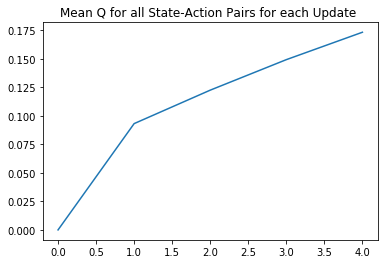

In [35]:
plt.plot(range(0,len(output_metric_table)), output_metric_table['mean_V'])
plt.title("Mean Q for all State-Action Pairs for each Update ")
plt.show()

In [36]:
Q_table_VI_3 = state_sub_full.copy()

In [37]:
optimal_action_list = pd.DataFrame()
for x in range(0,21):
    state_x = int(-10 + x)
    for y in range(0,21):
        state_y = int(-10 + y)
        
        Q_table_VI_3
        
        optimal_action = pd.DataFrame({'state_x':state_x, 'state_y': state_y, 
                                      'move_dir': Q_table_VI_3[ (Q_table_VI_3['state_x']==state_x) & (Q_table_VI_3['state_y']==state_y) &  (Q_table_VI_3['Q'] == max(Q_table_VI_3[(Q_table_VI_3['state_x']==state_x) & 
                                                      (Q_table_VI_3['state_y']==state_y)]['Q']))].reset_index(drop=True)['move_dir'][0],
                                      'throw_dir': Q_table_VI_3[ (Q_table_VI_3['state_x']==state_x) & (Q_table_VI_3['state_y']==state_y) &  (Q_table_VI_3['Q'] == max(Q_table_VI_3[(Q_table_VI_3['state_x']==state_x) & 
                                                      (Q_table_VI_3['state_y']==state_y)]['Q']))].reset_index(drop=True)['throw_dir'][0]},
                                     index = [state_y])
        optimal_action_list = optimal_action_list.append(optimal_action)
optimal_action_list = optimal_action_list.reset_index(drop=True)

In [38]:
optimal_action_list[(optimal_action_list['state_x']==-1)&(optimal_action_list['state_y']==-1)]

,state_x,state_y,move_dir,throw_dir
198,-1,-1,none,45


In [39]:
optimal_action_list['Action'] = np.where( optimal_action_list['move_dir'] == 'none', 'THROW', 'MOVE'  )

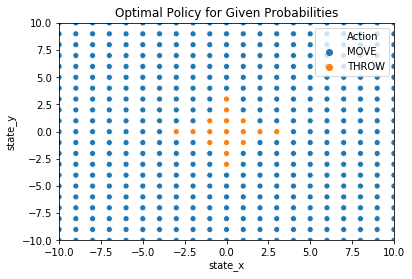

In [40]:
sns.scatterplot( x="state_x", y="state_y", data=optimal_action_list,  hue='Action')
plt.title("Optimal Policy for Given Probabilities")
plt.ylim([-10,10])
plt.xlim([-10,10])
plt.show()

In [55]:
optimal_action_list['move_x'] = np.where(optimal_action_list['move_dir'] == 0, int(0),
                                         np.where(optimal_action_list['move_dir'] == 1, int(1),
                                         np.where(optimal_action_list['move_dir'] == 2, int(1),
                                         np.where(optimal_action_list['move_dir'] == 3, int(1),
                                         np.where(optimal_action_list['move_dir'] == 4, int(0),
                                         np.where(optimal_action_list['move_dir'] == 5, int(-1),
                                         np.where(optimal_action_list['move_dir'] == 6, int(-1),
                                         np.where(optimal_action_list['move_dir'] == 7, int(-1),
                                         int(-1000)
                                        ))))))))
optimal_action_list['move_y'] = np.where(optimal_action_list['move_dir'] == 0, int(1),
                                         np.where(optimal_action_list['move_dir'] == 1, int(1),
                                         np.where(optimal_action_list['move_dir'] == 2, int(0),
                                         np.where(optimal_action_list['move_dir'] == 3, int(-1),
                                         np.where(optimal_action_list['move_dir'] == 4, int(-1),
                                         np.where(optimal_action_list['move_dir'] == 5, int(-1),
                                         np.where(optimal_action_list['move_dir'] == 6, int(0),
                                         np.where(optimal_action_list['move_dir'] == 7, int(1),
                                         int(-1000)
                                        ))))))))
optimal_action_list['throw_dir_2'] = np.where(optimal_action_list['throw_dir']=="none",int(-1000), optimal_action_list['throw_dir'])
#optimal_action_list.head(10)

In [42]:
arrow_scale = 0.1

In [54]:
# Define horizontal arrow component as 0.1*move direction or 0.1/-0.1 depending on throw direction
optimal_action_list['u'] = np.where(optimal_action_list['Action']=="MOVE", optimal_action_list['move_x']*arrow_scale,
                                    np.where(optimal_action_list['throw_dir_2']==0, 0,np.where(optimal_action_list['throw_dir_2']==180, 0,
                                    np.where(optimal_action_list['throw_dir_2']==90, arrow_scale ,np.where(optimal_action_list['throw_dir_2']==270, -arrow_scale,
                                    np.where(optimal_action_list['throw_dir_2']<180, arrow_scale,-arrow_scale))))))
#optimal_action_list.head(5)

In [53]:
# Define vertical arrow component based 0.1*move direciton or +/- u*tan(throw_dir) accordingly
optimal_action_list['v'] = np.where(optimal_action_list['Action']=="MOVE", optimal_action_list['move_y']*arrow_scale, 
                                    np.where(optimal_action_list['throw_dir_2']==0, arrow_scale,np.where(optimal_action_list['throw_dir_2']==180, -arrow_scale,
                                    np.where(optimal_action_list['throw_dir_2']==90, 0,np.where(optimal_action_list['throw_dir_2']==270, 0,
                                    optimal_action_list['u']/np.tan(np.deg2rad(optimal_action_list['throw_dir_2'].astype(np.float64))))))))
#optimal_action_list.head(5)

In [47]:
input_table = Q_table_VI.copy()
gamma = 0.8
num_repeats = 15

start_time = time.time()

output_metric_table = pd.DataFrame()
# Repeat until converges
for repeats in range(0,num_repeats):
    clear_output(wait=True)
    state_sub_full = pd.DataFrame()
    
    
    output_metric_table = output_metric_table.append(pd.DataFrame({'mean_Q':input_table['Q'].mean(), 
                                                                   'sum_Q': input_table['Q'].sum(),
                                                                   'mean_V':input_table[['state_x', 'state_y','V']].drop_duplicates(['state_x', 'state_y', 'V'])['V'].mean(),
                                                                   'sum_V': input_table[['state_x', 'state_y','V']].drop_duplicates(['state_x', 'state_y', 'V'])['V'].sum()}, index = [repeats]))
    
    
    # Iterate over all states defined by max - min of x times by max - min of y
    for x in range(0,21):
        state_x = -10 + x
        for y in range(0,21):
            state_y = -10 + y

            state_sub = input_table[ (input_table['state_x']==state_x) & (input_table['state_y']==state_y)]
            Q_sub_list = pd.DataFrame()
            for n, action in state_sub.iterrows():
                # Move action update Q
                if(action['throw_dir'] == "none"):
                    move_direction = action['move_dir']
                    #Map this to actual direction and find V(s) for next state
                    if(move_direction == 0):
                        move_x = 0
                        move_y = 1
                    elif(move_direction == 1):
                        move_x = 1
                        move_y = 1
                    elif(move_direction == 2):
                        move_x = 1
                        move_y = 0
                    elif(move_direction == 3):
                        move_x = 1
                        move_y = -1
                    elif(move_direction == 4):
                        move_x = 0
                        move_y = -1
                    elif(move_direction == 5):
                        move_x = -1
                        move_y = -1
                    elif(move_direction == 6):
                        move_x = -1
                        move_y = 0
                    elif(move_direction == 7):
                        move_x = -1
                        move_y = 1
                    Q = 1*(action['reward'] + gamma*max(input_table[ (input_table['state_x']==int(state_x+move_x)) & (input_table['state_y']==int(state_y+move_y))]['V']) )
                # Throw update Q +1 if sucessful throw or -1 if failed
                else:
                    Q = (action['prob']*(action['reward'] + gamma*1)) +  ((1-action['prob'])*(action['reward'] + gamma*-1))
                Q_sub_list = Q_sub_list.append(pd.DataFrame({'Q':Q}, index = [n]))
            state_sub['Q'] = Q_sub_list['Q']
            state_sub['V'] = max(state_sub['Q'])
            state_sub_full = state_sub_full.append(state_sub)
            
    
    
    ###
    # Create Quiver plot showing current optimal policy in one cell
    arrow_scale = 0.1

    Q_table_VI_3 = state_sub_full.copy()

    optimal_action_list = pd.DataFrame()
    for x in range(0,21):
        state_x = int(-10 + x)
        for y in range(0,21):
            state_y = int(-10 + y)

            Q_table_VI_3

            optimal_action = pd.DataFrame({'state_x':state_x, 'state_y': state_y, 
                                          'move_dir': Q_table_VI_3[ (Q_table_VI_3['state_x']==state_x) & (Q_table_VI_3['state_y']==state_y) &  (Q_table_VI_3['Q'] == max(Q_table_VI_3[(Q_table_VI_3['state_x']==state_x) & 
                                                          (Q_table_VI_3['state_y']==state_y)]['Q']))].reset_index(drop=True)['move_dir'][0],
                                          'throw_dir': Q_table_VI_3[ (Q_table_VI_3['state_x']==state_x) & (Q_table_VI_3['state_y']==state_y) &  (Q_table_VI_3['Q'] == max(Q_table_VI_3[(Q_table_VI_3['state_x']==state_x) & 
                                                          (Q_table_VI_3['state_y']==state_y)]['Q']))].reset_index(drop=True)['throw_dir'][0]},
                                         index = [state_y])
            optimal_action_list = optimal_action_list.append(optimal_action)
    optimal_action_list = optimal_action_list.reset_index(drop=True)

    optimal_action_list['Action'] = np.where( optimal_action_list['move_dir'] == 'none', 'THROW', 'MOVE'  )


    optimal_action_list['move_x'] = np.where(optimal_action_list['move_dir'] == 0, int(0),
                                             np.where(optimal_action_list['move_dir'] == 1, int(1),
                                             np.where(optimal_action_list['move_dir'] == 2, int(1),
                                             np.where(optimal_action_list['move_dir'] == 3, int(1),
                                             np.where(optimal_action_list['move_dir'] == 4, int(0),
                                             np.where(optimal_action_list['move_dir'] == 5, int(-1),
                                             np.where(optimal_action_list['move_dir'] == 6, int(-1),
                                             np.where(optimal_action_list['move_dir'] == 7, int(-1),
                                             int(-1000)
                                            ))))))))
    optimal_action_list['move_y'] = np.where(optimal_action_list['move_dir'] == 0, int(1),
                                             np.where(optimal_action_list['move_dir'] == 1, int(1),
                                             np.where(optimal_action_list['move_dir'] == 2, int(0),
                                             np.where(optimal_action_list['move_dir'] == 3, int(-1),
                                             np.where(optimal_action_list['move_dir'] == 4, int(-1),
                                             np.where(optimal_action_list['move_dir'] == 5, int(-1),
                                             np.where(optimal_action_list['move_dir'] == 6, int(0),
                                             np.where(optimal_action_list['move_dir'] == 7, int(1),
                                             int(-1000)
                                            ))))))))
    optimal_action_list['throw_dir_2'] = np.where(optimal_action_list['throw_dir']=="none",int(-1000), optimal_action_list['throw_dir'])

    # Define horizontal arrow component as 0.1*move direction or 0.1/-0.1 depending on throw direction
    optimal_action_list['u'] = np.where(optimal_action_list['Action']=="MOVE", optimal_action_list['move_x']*arrow_scale,
                                        np.where(optimal_action_list['throw_dir_2']==0, 0,np.where(optimal_action_list['throw_dir_2']==180, 0,
                                        np.where(optimal_action_list['throw_dir_2']==90, arrow_scale ,np.where(optimal_action_list['throw_dir_2']==270, -arrow_scale,
                                        np.where(optimal_action_list['throw_dir_2']<180, arrow_scale,-arrow_scale))))))

    # Define vertical arrow component based 0.1*move direciton or +/- u*tan(throw_dir) accordingly
    optimal_action_list['v'] = np.where(optimal_action_list['Action']=="MOVE", optimal_action_list['move_y']*arrow_scale, 
                                        np.where(optimal_action_list['throw_dir_2']==0, arrow_scale,np.where(optimal_action_list['throw_dir_2']==180, -arrow_scale,
                                        np.where(optimal_action_list['throw_dir_2']==90, 0,np.where(optimal_action_list['throw_dir_2']==270, 0,
                                        optimal_action_list['u']/np.tan(np.deg2rad(optimal_action_list['throw_dir_2'].astype(np.float64))))))))



    x = optimal_action_list['state_x']
    y = optimal_action_list['state_y']
    u = optimal_action_list['u'].values
    v = optimal_action_list['v'].values
    plt.figure(figsize=(10, 10))
    plt.quiver(x,y,u,v,scale=0.5,scale_units='inches')
    sns.scatterplot( x="state_x", y="state_y", data=optimal_action_list,  hue='Action')
    plt.title("Optimal Policy for Given Probabilities for iteration " +str(repeats))
    #plt.savefig('E:\\Documents\\RL\\RL from scratch v2\\QuiverPlots\\'+str(repeats)+'.png')   # save the figure to file
    plt.close() 

    ###
    input_table = state_sub_full.copy()
    print("Repeats completed: ", np.round((repeats+1)/num_repeats,2)*100, "%")
    
end_time = time.time()

print("total time taken this loop: ", np.round((end_time - start_time)/60,2), " minutes")

Repeats completed:  100.0 %
total time taken this loop:  42.3  minutes


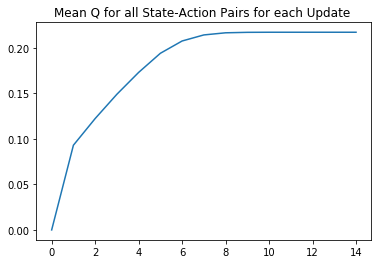

In [48]:
plt.plot(range(0,len(output_metric_table)), output_metric_table['mean_V'])
plt.title("Mean Q for all State-Action Pairs for each Update ")
plt.show()

### Qlearning